In [1]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params
from garch_framework.utils.datasets import LSTMGARCHDataset
from garch_framework.models import GARCHLSTM, GJRGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model

In [2]:
omega=0.2
alpha=0.2
gamma= 0.05
beta=0.5

In [3]:
grounds = [omega, alpha, gamma, beta]

In [4]:
data, volat = generate_ground_data(mode = 'GJRGARCH',omega=omega, alpha=alpha, gamma=gamma,beta=beta, n=10000)

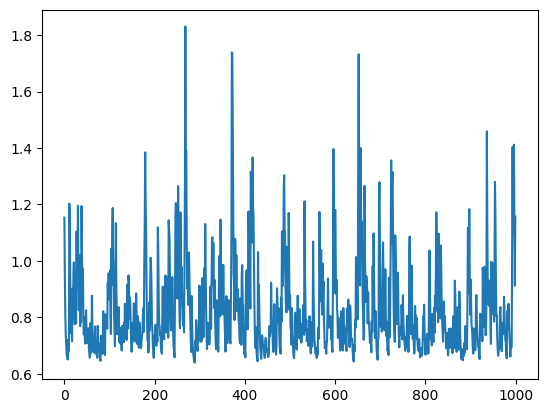

In [5]:
plt.plot(volat[:1000])

In [ ]:
dataset = LSTMGARCHDataset(data, volat, k=1, h = 1, )

In [7]:
dataset[3]

(tensor([35.1684]), tensor(70.6046))

In [8]:
core = GJRGARCHModel()

In [9]:
model = GARCHLSTM(core)
criterion = CorrectedNLoss()

In [10]:
model.parameters

<bound method Module.parameters of GARCHLSTM(
  (garch_core): GJRGARCHModel(
    (model): Sequential(
      (0): Linear(in_features=4, out_features=1, bias=False)
    )
  )
  (W_f): Linear(in_features=2, out_features=16, bias=True)
  (U_f): Linear(in_features=1, out_features=16, bias=False)
  (W_i): Linear(in_features=2, out_features=16, bias=True)
  (U_i): Linear(in_features=1, out_features=16, bias=False)
  (W_c): Linear(in_features=2, out_features=16, bias=True)
  (U_c): Linear(in_features=1, out_features=16, bias=False)
  (o_gate_linear): Linear(in_features=2, out_features=1, bias=True)
)>

In [11]:
dl = DataLoader(dataset, batch_size=8, shuffle=False,drop_last=False)

In [12]:
next(iter(dl))

[tensor([[ 39.6763],
         [-16.2329],
         [-28.3498],
         [ 35.1684],
         [  6.1916],
         [-23.0788],
         [ 15.6445],
         [ 24.1627]]),
 tensor([94.6873, 80.9241, 73.9952, 70.6046, 67.0833, 66.2061, 65.1197, 65.0926])]